In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Importing the libraries needed for entire project
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
import sklearn
import mglearn
import warnings 
import calendar
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
import pycats
from sklearn.metrics import roc_auc_score, roc_curve
import statsmodels.api as sm
import itertools
sns.set()
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

/Users/m.phetteplace/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/m.phetteplace/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
crimes = pd.read_csv ('final_crimes.csv')

In [4]:
# referenced Dr. Yingjie Zhang code

# Decision trees - Predict Primary Type

In [5]:
crimes['Type_factor'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [6]:
crimes['Location Description'] = pd.factorize(crimes['Location Description'])[0] 

In [7]:
#model 1

target_pt = 'Type_factor'
features_pt = ['X Coordinate','Y Coordinate', 'Hour','Month','Arrest', 'Community Area', 'Location Description']

#Split dataset to Training Set & Test Set
X, y = train_test_split(crimes, 
                        test_size = 0.3, 
                        train_size = 0.7, 
                        random_state= 0)

X_train_pt = X[features_pt]
y_train_pt = X[target_pt]
X_test_pt = y[features_pt]
y_test_pt = y[target_pt]

print('Feature Set Used    : ', features_pt)
print('Target Class        : ', target_pt)
print('Training Set Size   : ', X.shape)
print('Test Set Size       : ', y.shape)

tree1_pt = DecisionTreeClassifier(class_weight=None,
                               criterion='gini',
                               max_depth=None,
                               min_samples_leaf=50,
                               max_leaf_nodes=None,
                               splitter='best',
                               random_state=0)
tree1_pt.fit(X_train_pt, y_train_pt)

print("Accuracy on training set: {:.3f}".format(tree1_pt.score(X_train_pt, y_train_pt)))
print("Accuracy on test set: {:.3f}".format(tree1_pt.score(X_test_pt, y_test_pt)))

# Can accuracy be better? Maybe take out variables

Feature Set Used    :  ['X Coordinate', 'Y Coordinate', 'Hour', 'Month', 'Arrest', 'Community Area', 'Location Description']
Target Class        :  Type_factor
Training Set Size   :  (5001653, 26)
Test Set Size       :  (2143566, 26)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

Accuracy on training set: 0.520
Accuracy on test set: 0.488


In [7]:
#model 2

target_pt = 'Primary Type'
features_pt = ['X Coordinate','Y Coordinate', 'Hour','Month', 'Community Area', 'Location Description']

X, y = train_test_split(crimes, 
                        test_size = 0.3, 
                        train_size = 0.7, 
                        random_state= 0)

X_train_pt = X[features_pt]
y_train_pt = X[target_pt]
X_test_pt = y[features_pt]
y_test_pt = y[target_pt]

print('Feature Set Used    : ', features_pt)
print('Target Class        : ', target_pt)
print('Training Set Size   : ', X.shape)
print('Test Set Size       : ', y.shape)

tree2_pt = DecisionTreeClassifier(class_weight=None,
                               criterion='gini',
                               max_depth=None,
                               min_samples_leaf=50,
                               max_leaf_nodes=None,
                               splitter='best',
                               random_state=0)
tree2_pt.fit(X_train_pt, y_train_pt)

print("Accuracy on training set: {:.3f}".format(tree2_pt.score(X_train_pt, y_train_pt)))
print("Accuracy on test set: {:.3f}".format(tree2_pt.score(X_test_pt, y_test_pt)))

#Worse accuracy - do feature test

Feature Set Used    :  ['X Coordinate', 'Y Coordinate', 'Hour', 'Month', 'Community Area', 'Location Description']
Target Class        :  Primary Type
Training Set Size   :  (5001653, 24)
Test Set Size       :  (2143566, 24)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

Accuracy on training set: 0.393
Accuracy on test set: 0.348


In [8]:
#many variables to test importance

target_pt = 'Type_factor'
features_pt = ['X Coordinate','Y Coordinate', 'Year', 'Hour','Month', 'Arrest','Ward',
            'District','Beat','Domestic','Community Area', 'Location Description']

tree_many_pt= DecisionTreeClassifier()

#Split dataset to Training Set & Test Set
X, y = train_test_split(crimes, 
                        test_size = 0.3, 
                        train_size = 0.7, 
                        random_state= 0)

X_train_pt = X[features_pt]
y_train_pt = X[target_pt]
X_test_pt = y[features_pt]
y_test_pt = y[target_pt]

tree_many_pt = DecisionTreeClassifier()
tree_many_pt.fit(X_train_pt, y_train_pt)
tree_many_pt.feature_importances_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

array([0.20874828, 0.2063204 , 0.10443228, 0.0909582 , 0.12062519,
       0.06991431, 0.02018101, 0.00500312, 0.04305129, 0.06392437,
       0.0170743 , 0.04976725])

In [9]:
#tree after running feature test

target_pt = 'Type_factor'
features_pt = ['X Coordinate','Y Coordinate', 'Year', 'Hour','Month',
            'Arrest','Ward','Beat','Domestic', 'Community Area', 'Location Description']

X, y = train_test_split(crimes, 
                        test_size = 0.3, 
                        train_size = 0.7, 
                        random_state= 0)

X_train_pt = X[features_pt]
y_train_pt = X[target_pt]
X_test_pt = y[features_pt]
y_test_pt = y[target_pt]

print('Feature Set Used    : ', features_pt)
print('Target Class        : ', target_pt)
print('Training Set Size   : ', X.shape)
print('Test Set Size       : ', y.shape)

tree_final_pt = DecisionTreeClassifier(class_weight=None,
                               criterion='gini',
                               max_depth=100,
                               min_samples_leaf=50,
                               max_leaf_nodes=None,
                               splitter='best',
                               random_state=0)
tree_final_pt.fit(X_train_pt, y_train_pt)

print("Accuracy on training set: {:.3f}".format(tree_final_pt.score(X_train_pt, y_train_pt)))
print("Accuracy on test set: {:.3f}".format(tree_final_pt.score(X_test_pt, y_test_pt)))

# best accurancy that I could find.
# Ran before collapsing primary time and location description.  MUCH BETTER using collaped variables

Feature Set Used    :  ['X Coordinate', 'Y Coordinate', 'Year', 'Hour', 'Month', 'Arrest', 'Ward', 'Beat', 'Domestic', 'Community Area', 'Location Description']
Target Class        :  Type_factor
Training Set Size   :  (5001653, 26)
Test Set Size       :  (2143566, 26)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

Accuracy on training set: 0.563
Accuracy on test set: 0.537


# Plot decision tree_final

In [10]:
# Referenced to plot tree - https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

In [11]:
from sklearn.tree import export_graphviz
print(features_pt)
export_graphviz(
    tree_final_pt,
    feature_names=features_pt,
    out_file="tree_pt.dot",
    max_depth=10
)

['X Coordinate', 'Y Coordinate', 'Year', 'Hour', 'Month', 'Arrest', 'Ward', 'Beat', 'Domestic', 'Community Area', 'Location Description']


In [12]:
import graphviz
from IPython.display import display
with open("tree_pt.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# Decision Tree - Predict Arrest

In [13]:
target_arrest = 'Arrest'
features_arrest = ['Beat', 'District', 'Ward', 'Community Area', 'Year', 'Month', 'Location Description', 'Type_factor']

#Split dataset to Training Set & Test Set
X, y = train_test_split(crimes, 
                        test_size = 0.3, 
                        train_size = 0.7, 
                        random_state= 0)

X_train_arrest = X[features_arrest]
y_train_arrest = X[target_arrest]
X_test_arrest = y[features_arrest]
y_test_arrest = y[target_arrest]

print('Feature Set Used    : ', features_arrest)
print('Target Class        : ', target_arrest)
print('Training Set Size   : ', X.shape)
print('Test Set Size       : ', y.shape)

#feature test
tree_arrest = DecisionTreeClassifier()
tree_arrest.fit(X_train_arrest, y_train_arrest)
tree_arrest.feature_importances_

# Accuracy?
tree_arrest.fit(X_train_arrest, y_train_arrest)

print("Accuracy on training set: {:.3f}".format(tree_arrest.score(X_train_arrest, y_train_arrest)))
print("Accuracy on test set: {:.3f}".format(tree_arrest.score(X_test_arrest, y_test_arrest)))

Feature Set Used    :  ['Beat', 'District', 'Ward', 'Community Area', 'Year', 'Month', 'Location Description', 'Type_factor']
Target Class        :  Arrest
Training Set Size   :  (5001653, 26)
Test Set Size       :  (2143566, 26)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

array([0.08651648, 0.00561239, 0.03166485, 0.03141121, 0.08651651,
       0.1061353 , 0.04870979, 0.60343347])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Accuracy on training set: 0.933
Accuracy on test set: 0.862


In [14]:
#Confusion Matrix

y_pred_dt = tree_arrest.predict(X_test_arrest)

print(confusion_matrix(y_test_arrest, y_pred_dt))
print('Precision score: {:.4f}'.format(precision_score(y_test_arrest,y_pred_dt)))
print('Recall score: {:.4f}'.format(recall_score(y_test_arrest,y_pred_dt)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_arrest,y_pred_dt)))
print('F1 score: {:.4f}'.format(f1_score(y_test_arrest,y_pred_dt)))

[[1431141  107154]
 [ 187782  417489]]
Precision score: 0.7958
Recall score: 0.6898
Accuracy score: 0.8624
F1 score: 0.7390


AUC for Decision tree: 0.855


Text(0, 0.5, 'Recall')

Text(0.5, 0, '1-specificity')

Text(0.5, 1.0, 'ROC Curve')

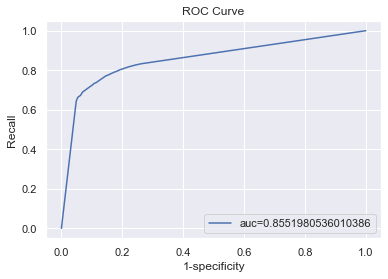

In [15]:
#ROC curve
dt_auc = roc_auc_score(y_test_arrest, tree_arrest.predict_proba(X_test_arrest)[:,1])

print("AUC for Decision tree: {:.3f}".format(dt_auc))

y_pred_proba_dt = tree_arrest.predict_proba(X_test_arrest)[::,1]

fpr, tpr, threshold = roc_curve(y_test_arrest,  y_pred_proba_dt)
auc = roc_auc_score(y_test_arrest, y_pred_proba_dt)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

# Plot decision tree_arrest

In [16]:
# # Referenced to plot tree - https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

In [17]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_arrest,
    feature_names=features_arrest,
    out_file="tree_arrest.dot",
    max_depth=10
)

In [18]:
import graphviz
from IPython.display import display
with open("tree_arrest.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))